<div align="center">
    <img src="../../Images/javeriana.PNG" width="800" height="600">
</div>

**Juan David Villate Lemus**

**José Rafael Peña Gutiérrez**

**Laura Katherine Moreno Giraldo**

**William Ricardo Fernández Garnica**

## Movie Genre Classification

Classify a movie genre based on its plot.

<img src="https://raw.githubusercontent.com/sergiomora03/AdvancedTopicsAnalytics/main/notebooks/img/moviegenre.png"
     style="float: left; margin-right: 10px;" />



### Data

Input:
- movie plot

Output:
Probability of the movie belong to each genre


### Evaluation

- 30% Report with all the details of the solution, the analysis and the conclusions. The report cannot exceed 10 pages, must be send in PDF format and must be self-contained.
- 30% Code with the data processing and models developed that support the reported results.
- 30% Presentation of no more than 15 minutes with the main results of the project.
- 10% Model performance achieved. Metric: "AUC".

• The project must be carried out in groups of 4 people.
• Use clear and rigorous procedures.
• The delivery of the project is on March 15th, 2024, 11:59 pm, through email with Github link.
• No projects will be received after the delivery time or by any other means than the one established.




### Acknowledgements

We thank Professor Fabio Gonzalez, Ph.D. and his student John Arevalo for providing this dataset.

See https://arxiv.org/abs/1702.01992

## Sample Submission

In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)
dataTesting = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTesting.zip', encoding='UTF-8', index_col=0)

In [3]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [4]:
dataTesting.head()

,year,title,plot
1,1999,Message in a Bottle,"who meets by fate , shall be sealed by fate ...."
4,1978,Midnight Express,"the true story of billy hayes , an american c..."
5,1996,Primal Fear,martin vail left the chicago da ' s office to ...
6,1950,Crisis,husband and wife americans dr . eugene and mr...
7,1959,The Tingler,the coroner and scientist dr . warren chapin ...


In [5]:
import re
special_char_pattern = re.compile(r'[^a-zA-Z0-9\s]')

In [6]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    # "ï": "i",
    "£": "$",
    "à":"á",
    "è": "é",
    "ì": "í",
    "ò": "ó",
    "ù": "ú",
    "Bouvetøya":"Bouvet",
    " \' ":"'",
    "\'":"'"
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()


3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [7]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "bullard\'s": "bullards",
    "world\'s":"worlds",
    "avery\'s":"averys",
    "wallet\'s":"wallets",
    "father\'s": "fathers",
    "mother\'s": "mothers",
    "brother\'s": "brothers",
    "sister\'s": "sisters",
    "haakon\'s": "haakons",
    "king\'s": "kings",
    "queen\'s": "queens",
    "family\'s": "families",
    "father\'s": "fathers",
    "mother\'s": "mothers",
    "it\'s": "its",
    "won\'t":"wont",
    "weyland\'s": "weylands",
    "didn\'t": "didnt"
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()


3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [8]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [9]:
# Reemplazar caracteres especiales por su equivalente en texto
replacements = {
    "u. s.": "u.s.",
    "dr. t. ": "dr.",
    "!!": "!",
    "_": " "
}

# Aplicar todas las sustituciones
for old, new in replacements.items():
    dataTraining['plot'] = dataTraining['plot'].str.replace(old, new, regex=False)

# Verificar el reemplazo
dataTraining['plot'].head()

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
Name: plot, dtype: object

In [10]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [11]:
import pandas as pd
from ast import literal_eval

# Convertir los strings de géneros a listas si están en formato de string
dataTraining['genres'] = dataTraining['genres'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Obtener un conjunto único de géneros
generos_unicos = set()
for lista_generos in dataTraining['genres']:
    generos_unicos.update(lista_generos)

# Imprimir los géneros únicos
print(generos_unicos)


{'History', 'War', 'Sport', 'Family', 'Music', 'Documentary', 'Animation', 'Comedy', 'Western', 'Short', 'News', 'Thriller', 'Adventure', 'Sci-Fi', 'Musical', 'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Horror', 'Fantasy', 'Action', 'Film-Noir'}


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from scipy.sparse import hstack
import pandas as pd
from textblob import TextBlob


# Primero, calculamos las nuevas características
dataTraining['text_length'] = dataTraining['plot'].apply(len)  # Longitud del texto
dataTraining['sentiment'] = dataTraining['plot'].apply(lambda x: TextBlob(x).sentiment.polarity)  # Puntuación de sentimiento

# Preparación de las características textuales con TfidfVectorizer
vect = TfidfVectorizer(max_features=10000)
X_dtm = vect.fit_transform(dataTraining['plot'])

# Preparar las características adicionales
X_additional = dataTraining[['text_length', 'sentiment']]

# Asegurarse de que los géneros están en formato de lista de listas
dataTraining['genres'] = dataTraining['genres'].map(lambda x: eval(x) if isinstance(x, str) else x)

# Utilizar MultiLabelBinarizer para transformar las etiquetas de género
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])

# Dividir los datos en conjuntos de entrenamiento y prueba, incluyendo las nuevas características
X_train_dtm, X_test_dtm, X_train_additional, X_test_additional, y_train_genres, y_test_genres = train_test_split(X_dtm, X_additional, y_genres, test_size=0.20, random_state=22)

# Combinar las características textuales con las nuevas características
X_train_combined = hstack([X_train_dtm, X_train_additional])
X_test_combined = hstack([X_test_dtm, X_test_additional])

# Entrenamiento del modelo con las características combinadas
clf = OneVsRestClassifier(RandomForestClassifier(
    bootstrap=False,  # Uso del parámetro bootstrap
    max_depth=31,  # Profundidad máxima del árbol
    max_features='log2',  # Número de características a considerar al buscar la mejor división
    min_samples_leaf=11,  # Mínimo de muestras requeridas en un nodo hoja
    min_samples_split=9,  # Mínimo de muestras requeridas para dividir un nodo
    n_estimators=800,  # Número óptimo de árboles
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42  # Semilla para la reproducibilidad
))
clf.fit(X_train_combined, y_train_genres)

# Realizar predicciones en el conjunto de prueba
y_pred_genres = clf.predict_proba(X_test_combined)

# Calcular y mostrar el AUC ROC score
auc_score = roc_auc_score(y_test_genres, y_pred_genres, average='macro')
print(f"ROC AUC Score macro: {auc_score}")

# Calcular y mostrar el AUC ROC score
auc_score = roc_auc_score(y_test_genres, y_pred_genres, average='micro')
print(f"ROC AUC Score micro: {auc_score}")

ROC AUC Score macro: 0.8637622758187478
ROC AUC Score micro: 0.851221925952054


<ipython-input-13-8c7914f17bce>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


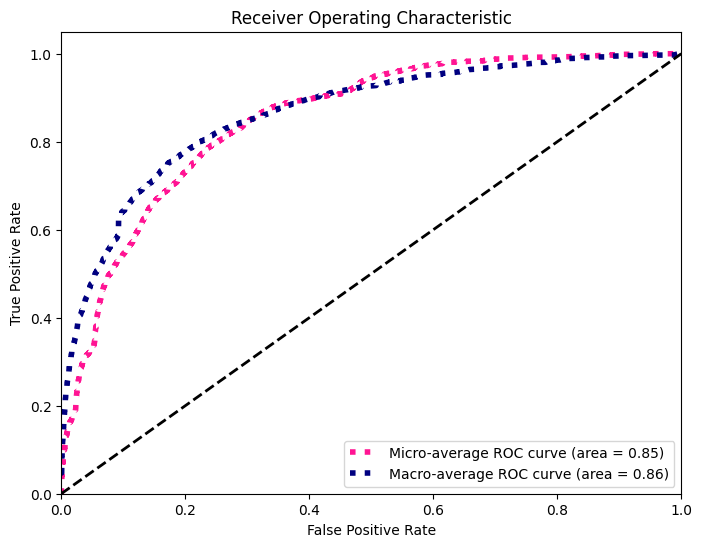

In [13]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from scipy import interp

# Número de clases
n_classes = y_genres.shape[1]

# Calcular las curvas ROC y AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_genres[:, i], y_pred_genres[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular el micro-average ROC curve y ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_genres.ravel(), y_pred_genres.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Calcular el macro-average ROC curve y ROC area
# Agregar todas las falsas tasas positivas
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolar todas las curvas ROC en este punto
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Promediarlas y calcular AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Graficar las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
